In [1]:
import os, sys
import pandas as pd
import numpy as np
import glob


import pylab as plt
from matplotlib.pyplot import get_cmap
%matplotlib inline  

src_dir = os.path.abspath(os.path.join(os.pardir,'personality-types-orig/src'))
sys.path[0] = src_dir

from analysis.factor_analysis import rotated_scaled_fa

pd.set_option("display.max_rows",10)

src_dir

'/Users/melissawessel/Documents/dev/python/personality-types-orig/src'

In [2]:

list_doms = ['N','E','O','A','C']
list_doms_labels = list_doms

fname_data = 'ipip300-no0_arr_qd_neoac_score-1.npy'
path_read = os.path.abspath(os.path.join(os.pardir,'personality-types-orig/data_filter/'))
filename= os.path.join(path_read,fname_data)
label = fname_data.split('.')

vmin=-1.
vmax=1.
cmapname = 'PuOr_r'

In [17]:
arr_qd = np.load(filename)
arr_qd

array([[ 0.29176813,  0.13484395,  0.09617777, -0.07874844, -0.27072028],
       [ 0.66767939, -0.15991844, -0.13481211,  0.1590757 , -0.10704724],
       [ 0.40285093,  0.14144724,  0.14412687, -0.19314111, -0.31843091],
       ...,
       [-0.06294733,  0.12292981,  0.04632722,  0.08090479,  0.59580562],
       [ 0.01398128, -0.08685482, -0.20461856,  0.342665  ,  0.44552779],
       [-0.10116846, -0.39579831, -0.20880112,  0.15635924,  0.42938315]])

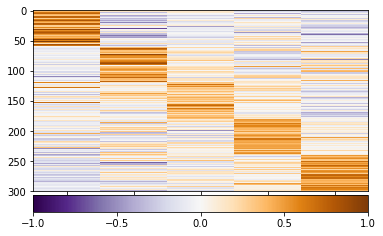

In [16]:
Q,n_dim = np.shape(arr_qd)

arr_z = arr_qd

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
# plt.title('Dimension - ')
im = ax.imshow(arr_z,vmin=vmin,vmax=vmax,cmap=cmapname,aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,ticks=[-1,-0.5,0,0.5,1],orientation='horizontal',pad=0.02)



In [3]:
questions = pd.read_csv('data/External/dataHeadings.csv')
dataRaw = pd.read_csv('data/External/dataRaw.csv', names=questions.QuestionCode)
dataRaw

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C+,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree strongly,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Agree moderately,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17852,4/7/17 13:06,4/7/17 13:08,Blue/Black,NaN,No,NaN,Natural light,Yes,NaN,Blue and white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
17853,4/7/17 13:05,4/7/17 13:08,White/Gold,NaN,Yes,NaN,Unsure,Yes,NaN,Blue and white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
17854,4/7/17 13:05,4/7/17 13:08,Blue/Black,NaN,No,NaN,Natural light,No,NaN,Blue and white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
17855,4/7/17 13:04,4/7/17 13:07,White/Gold,NaN,Yes,NaN,Unsure,No,NaN,Black and brown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN


In [4]:
dfTIPI = dataRaw[['E+','A-','C+','S-','O+','E-','A+','C-','S+','O-']]
dfTIPI

,E+,A-,C+,S-,O+,E-,A+,C-,S+,O-
0,Agree moderately,Agree strongly,Neither agree nor disagree,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately
1,Agree slightly,Agree moderately,Agree strongly,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly
2,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly
3,Disagree slightly,Agree moderately,Agree moderately,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree
4,Disagree moderately,Disagree slightly,Agree slightly,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly
...,...,...,...,...,...,...,...,...,...,...
17852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfTIPI = dfTIPI.replace(['Disagree strongly','Disagree moderately',
                            'Disagree slightly','Neither agree nor disagree',
                            'Agree slightly','Agree moderately','Agree strongly'],
                            [1,2,3,4,5,6,7])

In [6]:
dfTIPI = dfTIPI.dropna()

In [25]:
# reverse negatively coded items
dfTIPI[['A-','S-','E-','C-','O-']] = 8-dfTIPI[['A-','S-','E-','C-','O-']]

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [7]:
dfTIPI = dfTIPI[['E+','E-','S+','S-','C+','C-','O+','O-','A+','A-']]
dfTIPI

,E+,E-,S+,S-,C+,C-,O+,O-,A+,A-
0,6.0,5.0,5.0,5.0,4.0,6.0,7.0,2.0,7.0,7.0
1,5.0,3.0,6.0,5.0,7.0,1.0,5.0,1.0,6.0,6.0
2,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,6.0
3,3.0,3.0,6.0,2.0,6.0,2.0,6.0,4.0,3.0,6.0
4,2.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...
16696,6.0,2.0,5.0,3.0,4.0,5.0,5.0,1.0,5.0,4.0
16697,4.0,3.0,6.0,3.0,5.0,3.0,4.0,3.0,6.0,2.0
16698,1.0,7.0,7.0,3.0,7.0,1.0,7.0,4.0,5.0,2.0
16699,3.0,6.0,1.0,7.0,5.0,5.0,7.0,5.0,7.0,6.0


In [8]:
arrTIPI = np.array(dfTIPI)

In [9]:
arrTIPI

array([[6., 5., 5., ..., 2., 7., 7.],
       [5., 3., 6., ..., 1., 6., 6.],
       [5., 5., 5., ..., 5., 5., 6.],
       ...,
       [1., 7., 7., ..., 4., 5., 2.],
       [3., 6., 1., ..., 5., 7., 6.],
       [5., 5., 2., ..., 2., 3., 7.]])

In [10]:
result_fa = rotated_scaled_fa(5,arrTIPI,varimax_=True)

In [11]:
## factor loadings
arr_qd = result_fa[0] ## question-dimension-data
## factor scores
arr_pd = result_fa[1] ## person-dimension-data

In [13]:
arr_qd

array([[-1.68790185, -0.10699183, -0.04096223, -0.06287314, -0.12957255],
       [ 1.33757945,  0.07782577, -0.09423251,  0.11606914, -0.19426064],
       [ 0.07286381, -0.99282365, -0.35460835,  0.08187996, -0.32001194],
       [ 0.17184569,  1.63652862,  0.07238932,  0.01850883, -0.01581338],
       [-0.00483321, -0.17874152, -1.15792102,  0.01936129, -0.07777982],
       [-0.00987279,  0.21249027,  1.02099091, -0.08212942, -0.02522979],
       [-0.30973381, -0.24639625,  0.00310189, -0.3622332 , -0.16526425],
       [ 0.19605217, -0.00467175, -0.05436443,  1.24268656,  0.0590974 ],
       [-0.29515143,  0.08952688, -0.04202388, -0.13567377, -0.87809003],
       [-0.14426284,  0.48802977,  0.08991403,  0.06657485,  0.74372518]])

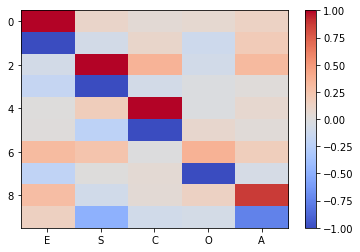

In [15]:
cm=get_cmap('coolwarm')
plt.imshow(-1*arr_qd,aspect='auto',vmin=-1,vmax=1,cmap=cm)
plt.colorbar()
plt.xticks([0,1,2,3,4],['E','S','C','O','A'])
plt.savefig('figFA')

In [89]:
dfTIPI_fa = pd.DataFrame(-1*arr_pd, columns=['E','S','C','O','A'])
dfTIPI_fa

,E,S,C,O,A
0,0.898994,-0.580063,-0.888327,0.448926,0.533724
1,0.697109,-0.506031,1.332992,0.845273,-0.112137
2,0.476580,-0.490484,-0.273507,-1.088284,-0.220377
3,-0.065933,0.963781,0.464924,-0.482761,-1.526226
4,-0.724405,-0.443180,-0.203592,-1.085699,0.484589
...,...,...,...,...,...
16176,1.158821,0.360161,-0.892768,0.776923,-0.425589
16177,0.235481,0.496316,-0.138771,-0.209593,0.397411
16178,-1.435119,0.765013,1.149835,-0.278628,0.403733
16179,-0.226628,-1.886198,-0.344966,-0.779537,0.458973


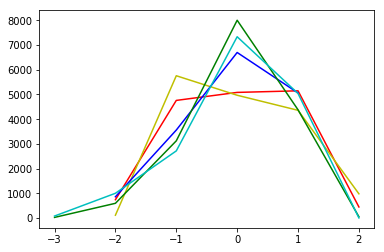

In [92]:
i=0
colors = ['r','y','b','g','c']
for trait in ['S','E','O','A','C']:
    r = round(dfTIPI_fa)
    plt.plot(r[trait].value_counts().sort_index(),color=colors[i])
    i+=1

In [71]:
r = round(dfTIPI_fa)
r['E'].value_counts()

 1.0    5758
-0.0    4969
-1.0    4359
-2.0     980
 2.0     115
Name: E, dtype: int64

In [93]:
dfTIPI_fa['N'] = -1*dfTIPI_fa['S']

In [94]:
dfTIPI_fa_NEOAC = dfTIPI_fa[['N','E','O','A','C','S']].drop(columns=['S'])

In [95]:
np.save('data/TIPI_fa_NEOAC.npy',dfTIPI_fa_NEOAC.values)

In [99]:
dfTIPI_fa_NEOAC

,N,E,O,A,C
0,0.580063,0.898994,0.448926,0.533724,-0.888327
1,0.506031,0.697109,0.845273,-0.112137,1.332992
2,0.490484,0.476580,-1.088284,-0.220377,-0.273507
3,-0.963781,-0.065933,-0.482761,-1.526226,0.464924
4,0.443180,-0.724405,-1.085699,0.484589,-0.203592
...,...,...,...,...,...
16176,-0.360161,1.158821,0.776923,-0.425589,-0.892768
16177,-0.496316,0.235481,-0.209593,0.397411,-0.138771
16178,-0.765013,-1.435119,-0.278628,0.403733,1.149835
16179,1.886198,-0.226628,-0.779537,0.458973,-0.344966
